In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

- train.csv - the training dataset; there are 7 binary targets: Pastry, Z_Scratch, K_Scatch, Stains, Dirtiness, Bumps, Other_Faults- 
test.csv - the test dataset; your objective is to predict the probability of each of the 7 binary targets

In [5]:
train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0   0        584        590     909972     909977            16            8   
1   1        808        816     728350     728372           433           20   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0            5               2274                    113  ...   
1           54              44478                     70  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  \
0            -0.5000           -0.0104          0.1417       0          0   
1             0.7419           -0.2997          0.9491       0          0   

   K_Scatch  Stains  Dirtiness  Bumps  Other_Faults  
0         0       1          0      0             0  
1         0       0          0      0             1  

[2 rows x 35 columns]

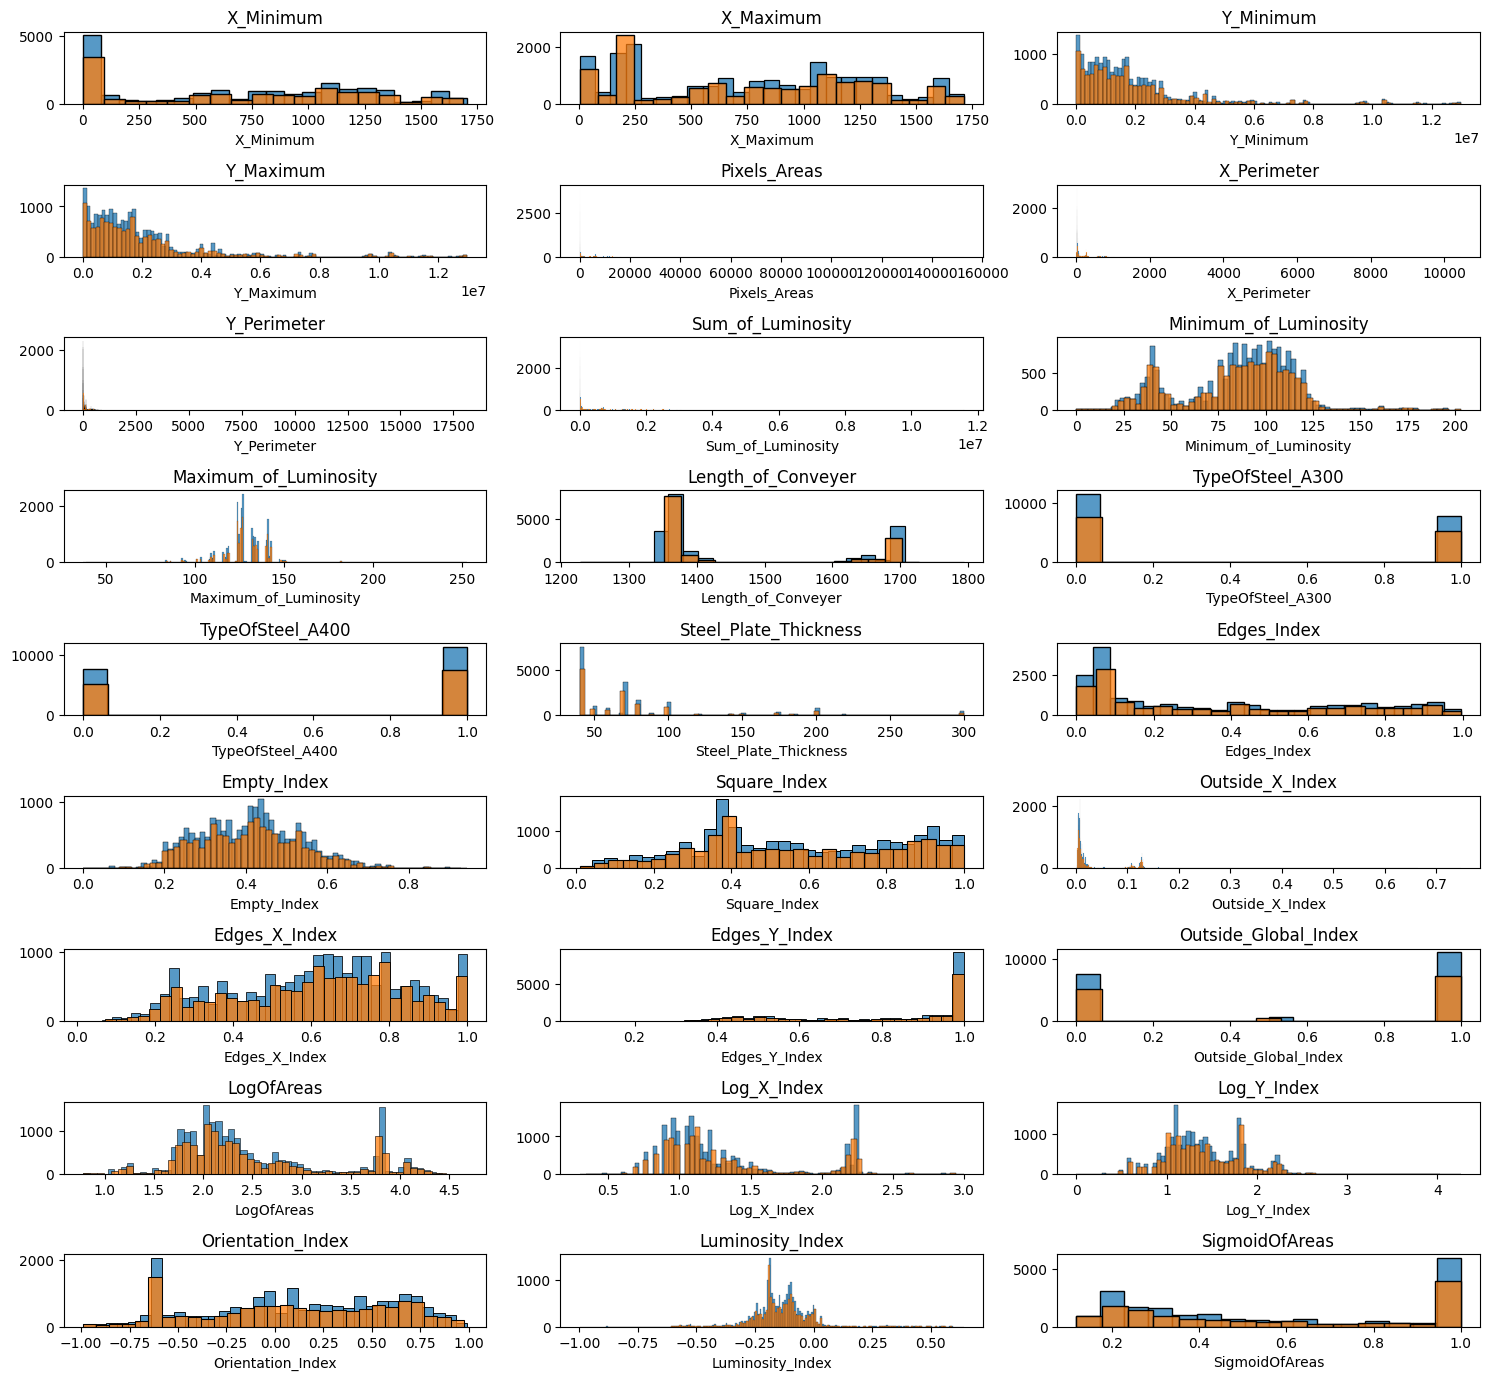

In [10]:
plt.figure(figsize=(15,15))

counter=1

for i in train.columns[:-7]:
    plt.subplot(10,3,counter)
    sns.histplot(train[i])
    sns.histplot(test[i])
    counter+=1
    plt.title(i)
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scl = pd.DataFrame(scaler.fit_transform(train.iloc[:,:-7]),columns=train.columns[:-7])
y = train.drop(columns=x_scl.columns)
x_scl

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0      -0.236778  -0.327831  -0.493713  -0.493938     -0.447155    -0.492949   
1       0.184647   0.124329  -0.589127  -0.589709     -0.335365    -0.425464   
2      -1.262119  -1.124112   0.190344   0.192770      2.601456     3.426816   
3       0.133850   0.070310   0.789801   0.794500     -0.395147    -0.447959   
4       1.561802   1.612854  -0.646859  -0.647650     -0.311774    -0.133028   
...          ...        ...        ...        ...           ...          ...   
19214   0.073646   0.006287  -0.896529  -0.898294     -0.446887    -0.515444   
19215   0.024731  -0.037729   0.335577   0.338530     -0.389518    -0.442336   
19216  -1.324204  -1.446226  -0.142737  -0.141583     -0.242341     0.103170   
19217  -1.318560  -1.472235  -0.071754  -0.070361     -0.417666    -0.464831   
19218   1.495955   1.542829  -0.061097  -0.059662     -0.402654    -0.402969   

       Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0        -0.585088          -0.428885               0.978888   
1        -0.100187          -0.333403              -0.514188   
2         3.521726           2.532830              -1.937820   
3        -0.347586          -0.426785               1.013611   
4         0.028460          -0.324913              -0.097516   
...            ...                ...                    ...   
19214    -0.594984          -0.429068               1.291393   
19215    -0.377274          -0.372640               0.666384   
19216     0.335234          -0.273147              -1.521147   
19217    -0.377274          -0.400528               0.110820   
19218    -0.308002          -0.382481               0.458047   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
0                   0.799671  ...        -0.522389       1.732355   
1                  -1.243070  ...        -0.554101      -1.640168   
2                   0.870111  ...         1.629799      -1.701772   
3                   0.377035  ...        -0.554101      -1.078081   
4                  -1.243070  ...        -0.241209      -1.817787   
...                      ...  ...              ...            ...   
19214               0.799671  ...        -0.554101       1.732355   
19215               0.306596  ...        -0.509704       0.533086   
19216              -2.440540  ...        -0.226410      -1.927057   
19217               0.236156  ...        -0.503361       0.694517   
19218               1.010989  ...        -0.471649       0.046093   

       Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  \
0           0.761892             -1.227910   -1.669010    -0.875450   
1           0.761892              0.846618    0.214350    -1.142425   
2          -2.018246             -1.227910    2.081276     1.851790   
3           0.449619              0.846618   -0.198900    -1.142425   
4           0.698985              0.846618    0.389091     0.218738   
...              ...                   ...         ...          ...   
19214      -0.143248             -1.227910   -1.634299    -1.142425   
19215       0.407077              0.846618   -0.144466    -0.579834   
19216       0.560046              0.846618    0.550421     0.253793   
19217       0.761892              0.846618   -0.490529    -0.579834   
19218       0.761892              0.846618   -0.280551    -0.356037   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0        -1.703257          -1.235969          1.063494       -1.294971  
1         0.844958           1.310641         -1.340511        1.135420  
2         2.021418          -0.232212          0.365477        1.288636  
3         0.102736           1.156438          0.815864       -0.509925  
4         1.210891           1.667237         -0.890123        1.288034  
...            ...                ...               ...             ...  
19214    -1.942198          -0.503708          1.186478       -0.848265  
192

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_scl,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [18]:
xgb.score(x_scl,y)

0.8023830584317603

In [23]:
test[y.columns] = xgb.predict_proba(test[x_scl.columns])
test.head()

id  X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  \
0  19219       1015       1033    3826564    3826588           659   
1  19220       1257       1271     419960     419973           370   
2  19221       1358       1372     117715     117724           289   
3  19222        158        168     232415     232440            80   
4  19223        559        592     544375     544389           140   

   X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  ...  \
0           23           46              62357                     67  ...   
1           26           28              39293                     92  ...   
2           36           32              29386                    101  ...   
3           10           11               8586                    107  ...   
4           19           15              15524                    103  ...   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas    Pastry  Z_Scratch  \
0             0.6727           -0.2261          0.9172  0.025069   0.000387   
1             0.9063           -0.1453          0.9104  0.142258   0.000135   
2            -0.5238           -0.0435          0.6514  0.035970   0.000371   
3             0.1818           -0.0738          0.2051  0.008647   0.000283   
4            -0.5714           -0.0894          0.4170  0.010067   0.000109   

   K_Scatch    Stains  Dirtiness     Bumps  Other_Faults  
0  0.036221  0.000006   0.021719  0.778287      0.191428  
1  0.042082  0.000006   0.008193  0.671078      0.144700  
2  0.074177  0.000008   0.002569  0.531285      0.601811  
3  0.032762  0.000006   0.010956  0.339212      0.194859  
4  0.058693  0.000009   0.001849  0.453169      0.517170  

[5 rows x 35 columns]

In [30]:
submission = test[pd.read_csv('sample_submission.csv').columns]
submission.to_csv('submission.csv',index=False)